The final theta is:
 2.5001306684288975
The final lost function is:
 -0.9999999829257616
After 45 step(s), we get the min value of lost function.


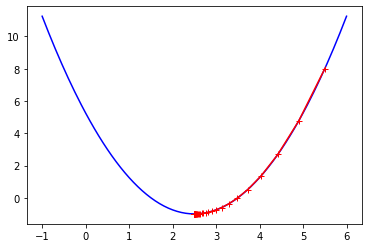

In [2]:
# 梯度下降法二维模拟
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt

plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5)**2 - 1  # 损失函数值，绘图用
# 损失函数
def J(theta):
    try:
        return (theta - 2.5)**2 - 1
    except:
        return float('inf')
# 梯度函数
def dJ(theta):
    return 2 * (theta - 2.5)
# 梯度下降算法
# epsilon = 1e-8  #判断 theta 是否为零的误差区间
def gradient_decent(initial_theta, eta, epsilon=1e-8, n_iters=1e4):
    theta = initial_theta
    theta_history.append(theta)
    i_iter = 0
    while i_iter < n_iters:
        gradiant = dJ(theta)
        last_theta = theta
        theta -= eta * gradiant
        theta_history.append(theta)
        if abs(J(theta) - J(last_theta)) < epsilon:
            break
        i_iter += 1
    return
# 绘制梯度下降过程
def plot_theta_history():
    plt.plot(plot_x, J(plot_x), c='b')
    theta_x = np.array(theta_history)
    plt.plot(theta_x, J(theta_x), c='r', marker='+')
    plt.show()

initial_theta = 5.5  # theta 初始点
theta_history = []  # 记录 theta 的变化
eta = 0.1  # 学习率，取 1.1 时将 n_iters 改为 10 看结果

# 可改变 initial_theta 和 eta 的值观察结果
gradient_decent(initial_theta, eta)
print("The final theta is:\n", theta_history[-1])
print("The final lost function is:\n", J(theta_history[-1]))
print("After",
      len(theta_history) - 1,
      "step(s), we get the min value of lost function.")
plot_theta_history()
